In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:41:49,584 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:41:49,586 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:41:49,587 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:41:49,591 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:41:49,592 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:41:49,603 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:41:50,043 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:41:50,047 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:41:50,048 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:41:50,049 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:41:50,050 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:41:50,051 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:41:50,052 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:41:50,054 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:41:50,517 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:41:50,638 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:41:50,641 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:41:50,642 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:41:50,647 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:41:51,116 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 1
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691135407289801, 864691135564655959, 864691135382947307,
       864691135736387732, 864691135771629819])


--- Working on Neuron 864691135407289801 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 277, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3334, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3611
n_valid_syn_ids_presyn = 277
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3334
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135407289801
Postsyn counts:
TP:3327
TN:0
FP:7
FN:0
Presyn counts:
TP:9
TN:0
FP:268
FN:0


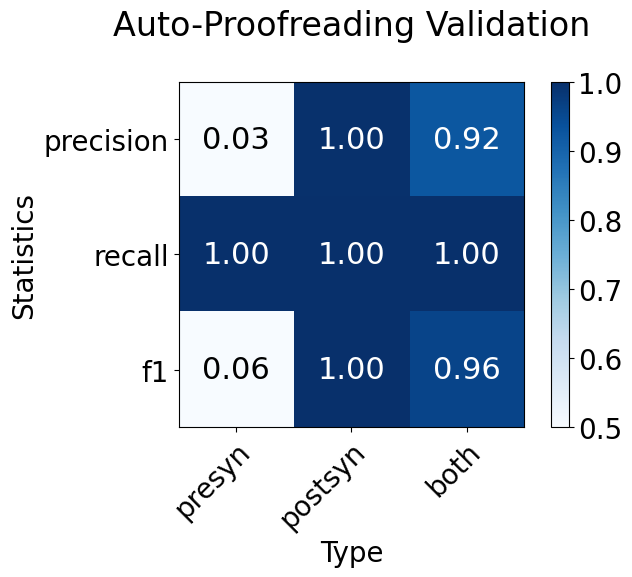

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135407289801_validation_df.pbz2
File size is 0.073787 MB
Total time for neuron 864691135407289801: 44.16053080558777

--- Working on Neuron 864691135564655959 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 88, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 1133, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1221
n_valid_syn_ids_presyn = 88
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 1133
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135564655959
Postsyn counts:
TP:1133
TN:0
FP:0
FN:0
Presyn counts:
TP:19
TN:0
FP:69
FN:0


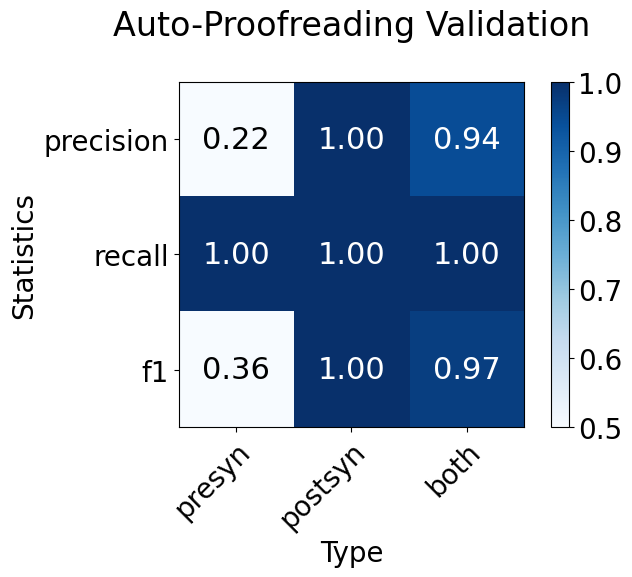

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135564655959_validation_df.pbz2
File size is 0.025752 MB
Total time for neuron 864691135564655959: 38.81710505485535

--- Working on Neuron 864691135382947307 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 83, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2634, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2717
n_valid_syn_ids_presyn = 83
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2634
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135382947307
Postsyn counts:
TP:2633
TN:0
FP:1
FN:0
Presyn counts:
TP:50
TN:0
FP:33
FN:0


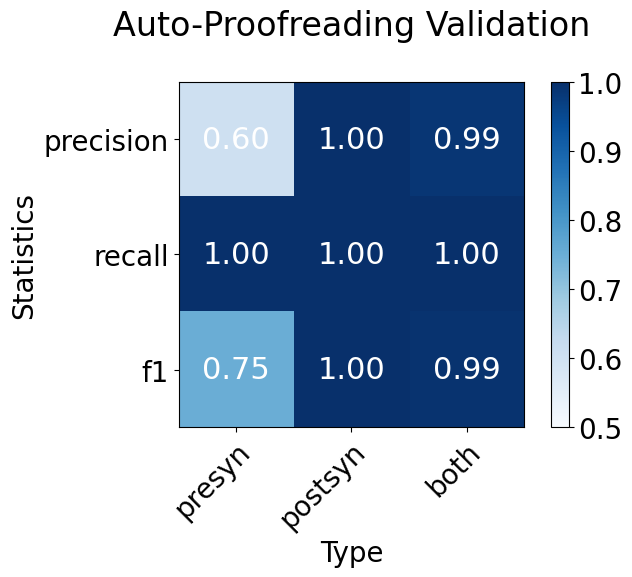

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135382947307_validation_df.pbz2
File size is 0.056134 MB
Total time for neuron 864691135382947307: 55.366370677948

--- Working on Neuron 864691135736387732 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 200, # error synapses  = 1, # error presyns = 0
For postsyn: # valid synapses = 4176, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4377
n_valid_syn_ids_presyn = 200
n_errored_syn_ids_presyn = 1
n_valid_syn_ids_postsyn = 4176
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135736387732
Postsyn counts:
TP:4170
TN:0
FP:6
FN:0
Presyn counts:
TP:40
TN:1
FP:160
FN:0


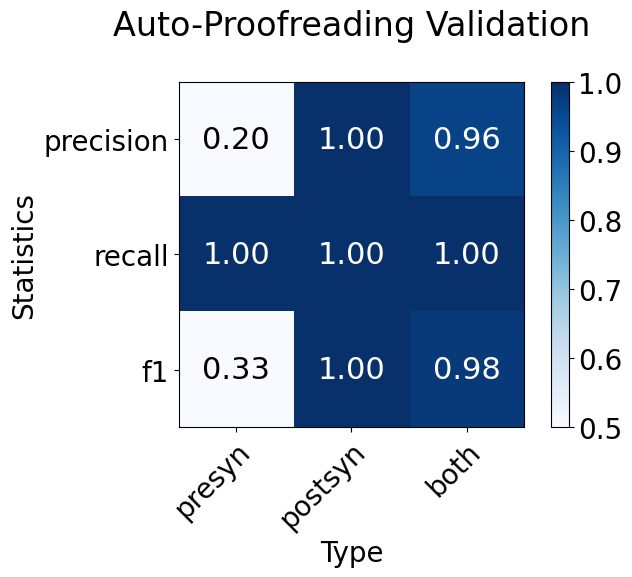

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135736387732_validation_df.pbz2
File size is 0.088202 MB
Total time for neuron 864691135736387732: 174.77140831947327

--- Working on Neuron 864691135771629819 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 290, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 1470, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1760
n_valid_syn_ids_presyn = 290
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 1470
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135771629819
Postsyn counts:
TP:1465
TN:0
FP:5
FN:0
Presyn counts:
TP:125
TN:0
FP:165
FN:0


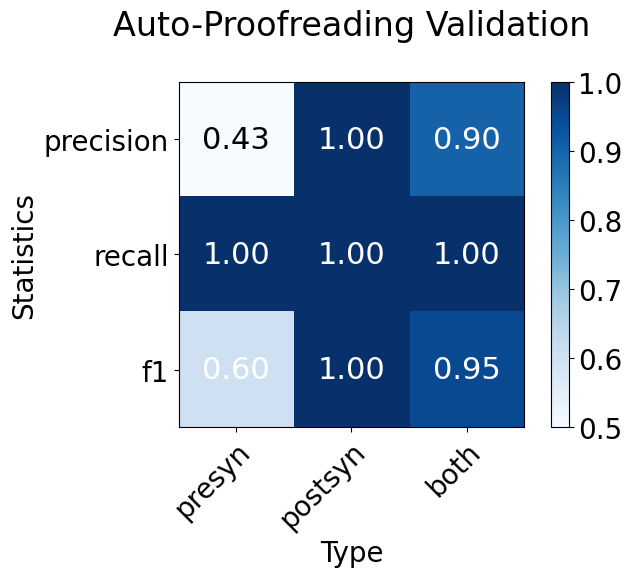

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135771629819_validation_df.pbz2
File size is 0.036908 MB
Total time for neuron 864691135771629819: 80.19422602653503


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")